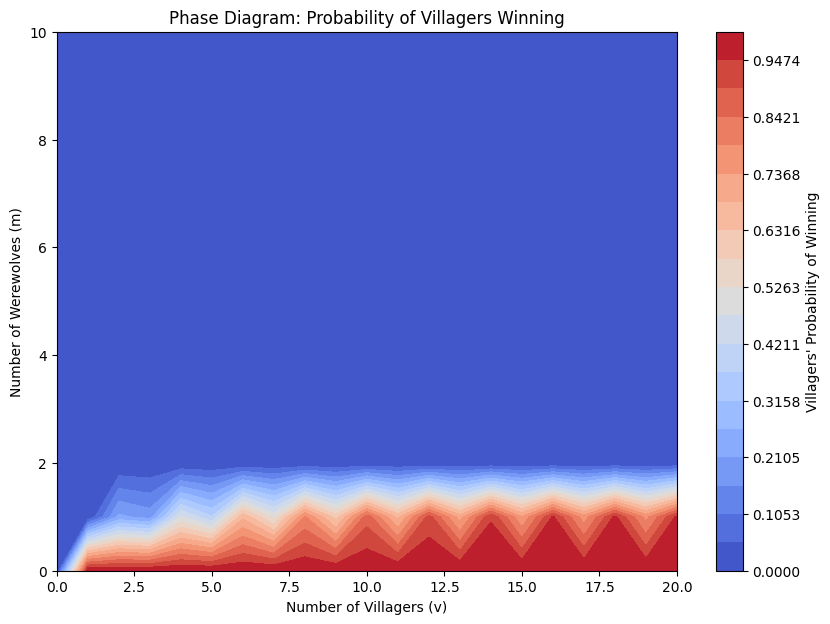

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def villagers_win_probability(n, m):
    #init with zeros
    dp = np.zeros((n + 1, m + 1))

    #base cases
    for v in range(n + 1):
        dp[v][0] = 1  #villagers win if werewolf goes to 0
    for m in range(m + 1):
        dp[0][m] = 0  #villagers 0 werewolves win

    #recursive relation
    for v in range(1, n + 1): #total players
        for m in range(1, min(v, m) + 1):
            total = v + m
            dp[v][m] = ((v * m)/(v**2 + (m*total) + m*v)) * dp[v - 1][m -1] + ((v**2 + (m*n))/(v**2 + (m*total) + m*v)) * dp[v - 2][m]
             #(v / total) * dp[v - 1][m] + (m / total) * dp[v][m - 1]

    return dp


n = 20  #total players
m = 10  #werewolves

#calculat proba
dp = villagers_win_probability(n, m)

#do and fill a meshgrid
V, M = np.meshgrid(np.arange(n + 1), np.arange(m + 1))

#plot
plt.figure(figsize=(10, 7))
plt.contourf(V, M, dp.T, cmap="coolwarm", levels=np.linspace(0, 1, 20))
plt.colorbar(label="Villagers' Probability of Winning")
plt.xlabel('Number of Villagers (v)')
plt.ylabel('Number of Werewolves (m)')
plt.title("Phase Diagram: Probability of Villagers Winning")
plt.show()

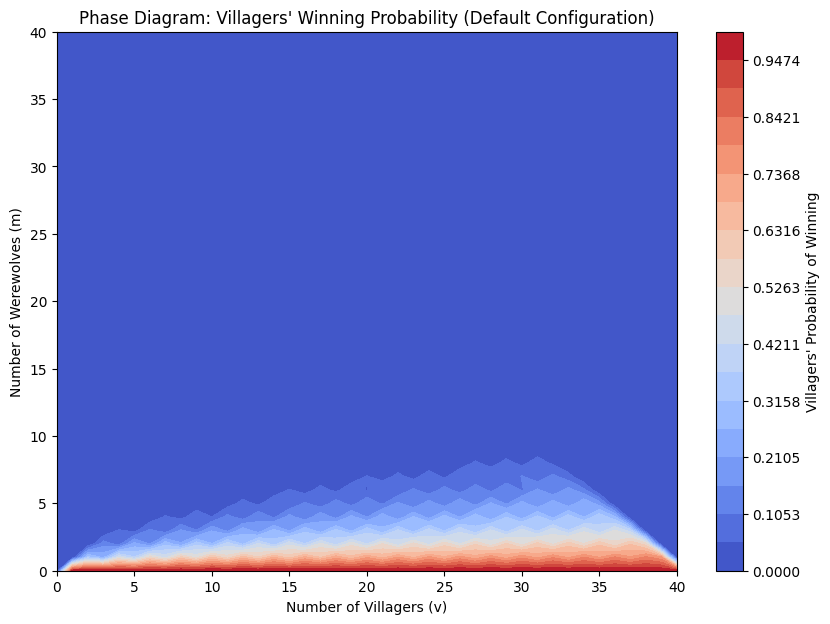

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def villagers_win_probability_default(n_max):

    dp = np.zeros((n_max + 1, n_max + 1))  # dp[v][m] stores probability that villagers win

    #base cases
    for v in range(n_max + 1):
        dp[v][0] = 1  #werewolves 0 villagers win
    for m in range(n_max + 1):
        dp[0][m] = 0  #villagers 0 villagers lose

    #recursive computation of probs
    for n in range(2, n_max + 1):  #total players
        for m in range(1, n):  # m werewolves, (n-m) villagers
            v = n - m  #num of villagers
            dp[v][m] = (v / n) * dp[v - 2][m] + (m / n) * dp[v -1][m - 1]

    return dp

#max number of players for analysis
n_max = 40  #total players max (villagers + werewolves)
dp = villagers_win_probability_default(n_max)

#meshgrid for plotting
V, M = np.meshgrid(np.arange(n_max + 1), np.arange(n_max + 1))

#plot
plt.figure(figsize=(10, 7))
plt.contourf(V, M, dp.T, cmap="coolwarm", levels=np.linspace(0, 1, 20))
plt.colorbar(label="Villagers' Probability of Winning")
plt.xlabel('Number of Villagers (v)')
plt.ylabel('Number of Werewolves (m)')
plt.title("Phase Diagram: Villagers' Winning Probability (Default Configuration)")
plt.show()